***

<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

***

# **NLP With Hotel Review Part 1**

By: Robby Khoutsaysana

***

In this project, we will begin with some Exploratory Data Analysis (EDA), and then move into data augmentation, modelling, and iteration over model improvements.

First let's look at the data set, which you can download from the [here](https://api.brainstation.io/content/link/1ZaOufpJjCLzUS8VaUnrgvjiupiwqWdC_).

Let's begin by importing some of the necessary libraries we will be using in this project.

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn default for plots

Next, let's read in the data set and take a look at the first few rows.

In [4]:
# importing dataset
hotel_df = pd.read_csv('hotel_reviews.csv')

# Using head() to print first 5 rows of the dataset
hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Now lets use the `.info()` method to get a better understanding of the data types and the number of non-null values in each column.

In [5]:
# Using info() to print information about the dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

We can see that this data set has 515,737 rows and 17 columns. We can also see that there are some missing values in the lat and lng columns. We will deal with these missing values later. First, let's review the data types and descriptions of each column.

Feature | Description
---|---------
`Hotel_Address` | Address of the hotel
`Additional_Number_of_Scoring` | Additional number of scoring
`Review_Date` | Date of the review
`Average_Score` | Average score of the hotel
`Hotel_Name` | Name of the hotel
`Reviewer_Nationality` | Where the reviewer is from
`Negative_Review` | The negative review comments
`Review_Total_Negative_Word_Counts` | The word count of the negative review
`Total_Number_of_Reviews` | Total number of reviews
`Positive_Review` | The positive review comments
`Review_Total_Positive_Word_Counts` | The word count of the positive review
`Total_Number_of_Reviews_Reviewer_Has_Given` | Total number of reviews the reviewer has given
`Tags` | Tags of the review
`days_since_review` | Days since the review
`lat` | Latitude of the hotel
`lng` | Longitude of the hotel

Target | Description
---|---------
`Reviewer_Score` | The score the reviewer gave

Now that we have a better understanding of the data set, let's explore the missing values in the data set.

In [6]:
# checking for missing values
hotel_df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

As we can see, there are over 3000 missing values in the lat and lng columns. Let's take a look at the rows with missing values and see if we can find a pattern.

In [7]:
# taking a look at the null values
nulls = hotel_df[hotel_df.isnull().any(axis=1)]

nulls.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
99488,20 Rue De La Ga t 14th arr 75014 Paris France,22,8/3/2017,7.8,Mercure Paris Gare Montparnasse,Australia,No Negative,0,377,Upgraded rooms are excellent Good size for tr...,25,6,10.0,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN
99489,20 Rue De La Ga t 14th arr 75014 Paris France,22,8/3/2017,7.8,Mercure Paris Gare Montparnasse,United Kingdom,Noise Not being told about this when we check...,12,377,The location was great However renovations we...,45,1,6.7,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN
99490,20 Rue De La Ga t 14th arr 75014 Paris France,22,7/25/2017,7.8,Mercure Paris Gare Montparnasse,United States of America,Room was worn down One of the curtains did no...,43,377,Location was good,5,1,5.4,"[' Leisure trip ', ' Solo traveler ', ' Standa...",9 days,NaN,NaN
99491,20 Rue De La Ga t 14th arr 75014 Paris France,22,6/22/2017,7.8,Mercure Paris Gare Montparnasse,Australia,Access to shower was by the tub which is very...,54,377,No Positive,0,13,8.3,"[' Leisure trip ', ' Couple ', ' Standard Twin...",42 days,NaN,NaN
99492,20 Rue De La Ga t 14th arr 75014 Paris France,22,5/24/2017,7.8,Mercure Paris Gare Montparnasse,United States of America,The breakfast was way over priced and the sta...,83,377,The property was conveniently located near th...,11,2,5.8,"[' Leisure trip ', ' Couple ', ' Standard Room...",71 days,NaN,NaN


In [8]:
# checking the count of unique values in the missing rows
count_n = nulls['Hotel_Address'].nunique()

print(f'There are {count_n} unique hotel addresses with missing values')

There are 17 unique hotel addresses with missing values


So it looks like we can use the hotel addresses to find the latitude and longitude of the hotels. Unfortunately, this will be a manual process because the addresses seem to be spelt incorrectly. But luckily, there is only 17 hotels we need to find the lat and lng for. So, in this case we can google search the correct spelling, and then google the corresponding coordinates. After manually finding the latitude and longitude of the hotels, we can fill in the missing values. 

Once cleaned, we can save the data set as a csv file and then read it back in.

In [9]:
# importing cleaned dataset
hotel_df_cleaned = pd.read_csv('hotel_reviews_cleaned.csv', encoding='latin-1')

hotel_df_cleaned.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


Let's check to see if there are any more missing values.

In [10]:
# checking for missing values
hotel_df_cleaned.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

Now that we have filled in the missing values, let's take a look for duplicates.

In [11]:
# checking for duplicate rows
hotel_df_cleaned.duplicated().sum()

526

There is a few duplicates in the data set. Since there is no unique identifier, we can assume that that these duplicates might be different reviews for the same hotel. 

Let's take a closer look at the duplicates to confirm this.

In [12]:
# looking into the duplicated rows
hotel_df_cleaned[hotel_df_cleaned.duplicated().sort_values(ascending=False)].head(6)

C:\Users\robby\AppData\Local\Temp\ipykernel_25400\1067984965.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hotel_df_cleaned[hotel_df_cleaned.duplicated().sort_values(ascending=False)].head(6)


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
23704,100 110 Euston Road Camden London NW1 2AJ Unit...,728,2/25/2017,8.9,Pullman London St Pancras,China,none,2,3168,good location and super nice staff room is bi...,13,39,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",159 day,51.528677,-0.128349
61876,16 22 Great Russell Street Camden London WC1B ...,300,7/27/2017,9.0,The Bloomsbury Hotel,Israel,No Negative,0,1254,The attention received by Sebastian and his t...,12,4,9.6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",7 days,51.517167,-0.129053
68967,167 rue de Rome 17th arr 75017 Paris France,11,6/23/2017,6.8,Villa Eugenie,Netherlands,Location is very old not invested in past yea...,41,165,Location is central accessible by train parki...,12,24,4.6,"[' Business trip ', ' Solo traveler ', ' Singl...",41 days,48.887128,2.314205
68968,167 rue de Rome 17th arr 75017 Paris France,11,4/27/2017,6.8,Villa Eugenie,United Kingdom,This hotel I don t think so is 4 star B B hav...,93,165,Nothing,2,10,2.5,"[' Business trip ', ' Solo traveler ', ' Singl...",98 days,48.887128,2.314205
68969,167 rue de Rome 17th arr 75017 Paris France,11,3/4/2017,6.8,Villa Eugenie,South Africa,The staff were not helpful at all It took us ...,69,165,Near bus terminal,4,4,5.0,"[' Leisure trip ', ' Couple ', ' Twin Room ', ...",152 day,48.887128,2.314205
68970,167 rue de Rome 17th arr 75017 Paris France,11,10/20/2016,6.8,Villa Eugenie,Lithuania,We booked hotel for 3 nights and there was no...,39,165,Good place,4,9,6.7,"[' Business trip ', ' Group ', ' Superior Doub...",287 day,48.887128,2.314205


As expected, the duplicates have different reviews, but the same hotel address/hotel name. So we will keep the duplicates in the data set to ensure that we have a good representation of the reviews for each hotel.

Now that we have cleaned the data, we can begin with the EDA.

***

## **Exploratory Data Analysis**

The target column of interest is `Reviewer_Score`.

Let's being by taking a look at the shape of the data set.

In [13]:
# Finding the shape of the dataset
shape = hotel_df_cleaned.shape

print(f'The shape of the dataset is {shape[0]} rows and {shape[1]} columns.')

The shape of the dataset is 515738 rows and 17 columns.


Next, we will convert the Reviewer_Score column to an integer from 1 to 10. This will make it easier to visualize the distribution of the data.

In [14]:
# converting the Reviewer_Score column to an integer from 1 to 10
hotel_df_cleaned['Reviewer_Score'] = hotel_df_cleaned['Reviewer_Score'].astype(int)

# inspecting the results
hotel_df_cleaned['Reviewer_Score'].sample(5)

320566     7
498426     7
409967     7
106513     7
265365    10
Name: Reviewer_Score, dtype: int32

We can assume that the distribution of the reviews will be based on the satisfaction of the customer. So we can assume that the distribution will be skewed to the right or left, meaning that if the the customer is satisfied, the review score will be higher(left skewed). If the customer is not satisfied, the review score will be lower(right skewed).

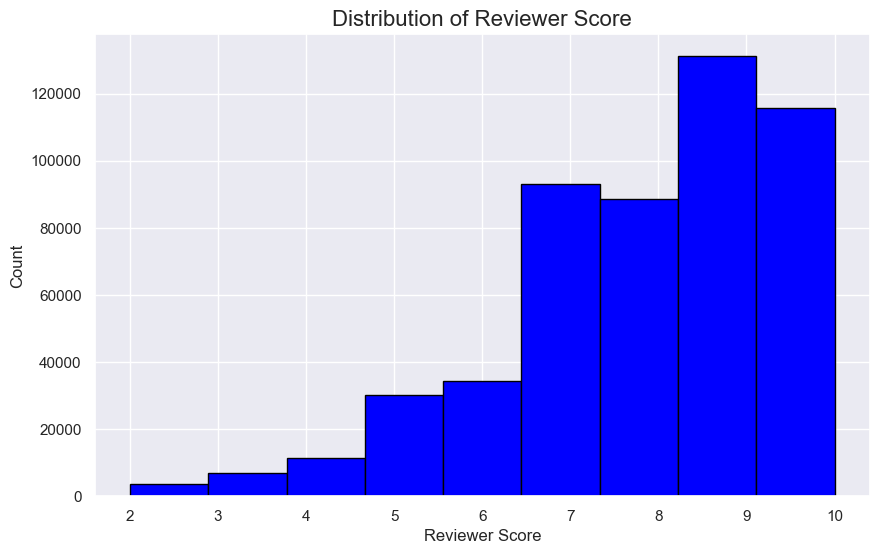

In [15]:
# plotting the distribution of the Reviewer_Score column

plt.figure(figsize=(10, 6))
plt.hist(hotel_df_cleaned['Reviewer_Score'], bins=9, color='blue', edgecolor='black')
plt.title('Distribution of Reviewer Score', fontsize=16)
plt.xlabel('Reviewer Score')
plt.ylabel('Count')
plt.show()

As expected, the distribution is skewed to the left. This means that the majority of the reviews are positive.

The problem with this distribution is that the model will be biased towards predicting positive reviews. This is because the majority of the reviews are positive. So the model will be more likely to predict positive reviews. So we will need to balance the data set. We can do this by either undersampling the majority class or oversampling the minority class.

***

This dataset has a good mix of numeric and non-numeric columns. Let's see if we can convert the non-numeric columns to numeric columns.

To find out which columns are numeric, we can use the `df.info()` method. This will give us the data type of each column. Let's create a function to find the numeric columns, and then use the function to also find the non-numeric columns.

In [16]:
# creating a function to find all the numeric columns, and also the non-numeric columns

def find_numeric_and_non_numeric_columns(df):
    numeric_columns = []
    non_numeric_columns = []
    for column in df.columns:
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            numeric_columns.append(column)
        else:
            non_numeric_columns.append(column)

    print(f'The numeric columns are: {numeric_columns}')
    print(f'The non-numeric columns are: {non_numeric_columns}')

find_numeric_and_non_numeric_columns(hotel_df_cleaned)

The numeric columns are: ['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'lat', 'lng']
The non-numeric columns are: ['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Reviewer_Score', 'Tags', 'days_since_review']


Now that we have found the numeric and non-numeric columns, we can dig deeper into the non-numeric columns.

Let's create a function to find the unique values in each non-numeric column. This will give us a better understanding of the data in each column and show us how we can convert the non-numeric columns to numeric.

In [17]:
# lets look at the non-numeric columns
for column in hotel_df_cleaned.columns:
    if hotel_df_cleaned[column].dtype == 'object':
        print(f'The unique values in the {column} column are: {hotel_df_cleaned[column].unique()}')

The unique values in the Hotel_Address column are: [' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands'
 '1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom'
 '1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom'
 ...
 'Wilton Place Knightsbridge Westminster Borough London SW1X 7RL United Kingdom'
 'Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom'
 'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria']
The unique values in the Review_Date column are: ['8/3/2017' '7/31/2017' '7/24/2017' '7/17/2017' '7/9/2017' '7/8/2017'
 '7/7/2017' '7/6/2017' '7/4/2017' '7/3/2017' '6/30/2017' '6/29/2017'
 '6/20/2017' '6/19/2017' '6/12/2017' '6/10/2017' '5/29/2017' '5/27/2017'
 '5/25/2017' '5/22/2017' '5/21/2017' '5/16/2017' '5/11/2017' '5/9/2017'
 '5/2/2017' '4/27/2017' '4/26/2017' '4/20/2017' '4/19/2017' '4/18/2017'
 '4/16/2017' '4/14/2017' '4/10/2017' '4/5/2017' '3/29/2017' '3/22/2017'
 '3/20/2017' '3/19/20

After taking a closer look at unique values, we can see that all of the non-numeric columns can be turned into numeric columns. This can be done by preforming some feature engineering, One-Hot Encoding or using the get_dummies method, converting date columns to numeric, and more. We will do this in the next section.

## **3. Data Wrangling**

We will begin by Converting the `Reviewer_Score` column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with  scores 9 and 10 as 1 ('good').

In [18]:
# binning the Reviewer_Score column into 2 categories: 0 for bad reviews (0-8) and 1 for good reviews (9-10)
hotel_df_cleaned['Reviewer_Score'] = hotel_df_cleaned['Reviewer_Score'].apply(lambda x: 0 if x <= 8 else 1)

# checking the results
hotel_df_cleaned['Reviewer_Score'].value_counts()

0    268701
1    247037
Name: Reviewer_Score, dtype: int64

Now that we have encoded the `Reviewer_Score` column, this should fix the problem with biasing the model towards predicting positive reviews.

Let's continue to convert the other non-numeric columns we've identified earlier into numeric columns, except for the Positive_Review and Negative_Review.

## **Hotel_Address**

Let's begin with the `Hotel_Address` column. 

In [19]:
# using the .value_counts() method to find the unique values in the Hotel_Address column
v_counts = hotel_df_cleaned['Hotel_Address'].value_counts()

# using the nunique() method to find the number of unique values in the Hotel_Address column
n_uniq = hotel_df_cleaned['Hotel_Address'].nunique()

print(v_counts)
print(f'There are {n_uniq} unique values in the Hotel_Address column.')

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
21 rue Lavoisier 8th arr 75008 Paris France                                         12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: Hotel_Address, Length: 1493, dtype: i

With this many unique values, it will be difficult to turn this column into numeric values. Another problem is that the `Hotel_Address` column is not ordinal. So we can't just assign a number to each unique value. So instead, we can reduce the number of unique values by grouping the hotels by city and country.

In [20]:
# extracting the city and country from the Hotel_Address column
hotel_df_cleaned['Hotel_City_Country'] = hotel_df_cleaned['Hotel_Address'].str.split(' ').str[-2:]

# checking the results
hotel_df_cleaned['Hotel_City_Country'].value_counts()

[United, Kingdom]           262301
[Barcelona, Spain]           59942
[Paris, France]              59546
[Amsterdam, Netherlands]     57214
[Milan, Italy]               37207
[Vienna, Austria]            36260
[Wien,, Austria]              2679
[Paris,, France]               382
[Barcelona,, Spain]            207
Name: Hotel_City_Country, dtype: int64

This looks much better. But we will still need to clean up the data a bit more. We can see that there are some extra spaces and special characters. Let's clean this up.

In [21]:
# removing the square brackets from the Hotel_City_Country column
hotel_df_cleaned['Hotel_City_Country'] = hotel_df_cleaned['Hotel_City_Country'].str.join(' ').str.replace('[', '').str.replace(']', '')

# checking the results
hotel_df_cleaned['Hotel_City_Country'].value_counts()

C:\Users\robby\AppData\Local\Temp\ipykernel_25400\929830924.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hotel_df_cleaned['Hotel_City_Country'] = hotel_df_cleaned['Hotel_City_Country'].str.join(' ').str.replace('[', '').str.replace(']', '')


United Kingdom           262301
Barcelona Spain           59942
Paris France              59546
Amsterdam Netherlands     57214
Milan Italy               37207
Vienna Austria            36260
Wien, Austria              2679
Paris, France               382
Barcelona, Spain            207
Name: Hotel_City_Country, dtype: int64

It looks like there are still some duplicates that need to be cleaned up.

In [22]:
# replacing the duplicates with the correct values
hotel_df_cleaned['Hotel_City_Country'] = hotel_df_cleaned['Hotel_City_Country'].str.replace('Wien,', 'Vienna').str.replace('Paris,', 'Paris').str.replace('Barcelona,', 'Barcelona').str.replace('United Kingdom', 'London United Kingdom')

# checking the results
hotel_df_cleaned['Hotel_City_Country'].value_counts()

London United Kingdom    262301
Barcelona Spain           60149
Paris France              59928
Amsterdam Netherlands     57214
Vienna Austria            38939
Milan Italy               37207
Name: Hotel_City_Country, dtype: int64

Now we can drop the `Hotel_Address` column as we have created a new column called `Hotel_City_Country`.

In [23]:
# dropping the Hotel_Address column
hotel_df_cleaned.drop('Hotel_Address', axis=1, inplace=True)

# checking the results
hotel_df_cleaned.columns

Index(['Additional_Number_of_Scoring', 'Review_Date', 'Average_Score',
       'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Hotel_City_Country'],
      dtype='object')

Lets take a quick look at the distribution of the `Hotel_City_Country` column and see what we can learn from it.

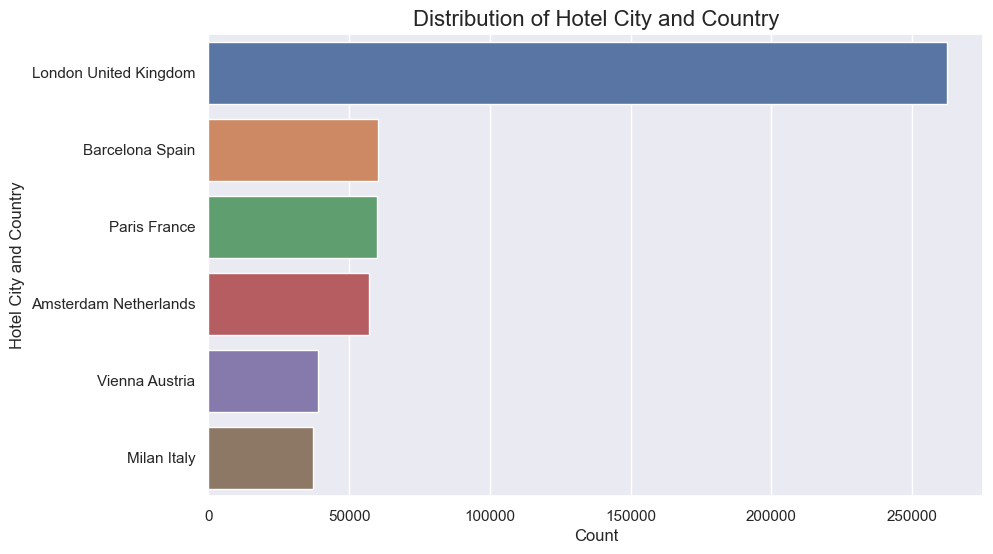

In [24]:
# plotting the distribution of the Hotel_City_Country column
plt.figure(figsize=(10, 6))
sns.countplot(y=hotel_df_cleaned['Hotel_City_Country'], order=hotel_df_cleaned['Hotel_City_Country'].value_counts().index)
plt.title('Distribution of Hotel City and Country', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Hotel City and Country')
plt.show()

It looks like the majority of the hotels are located in London, followed by Barcelona, Paris, and then Amsterdam.

Now that we have reduced the number of unique values, we can turn the `Hotel_City_Country` column into a binary column. We can do this by using the get_dummies method.

In [25]:
# using get_dummies to convert the Hotel_City_Country column to dummy variables
hotel_df = pd.get_dummies(hotel_df_cleaned, columns=['Hotel_City_Country'], drop_first=True)

# checking the results
print(hotel_df.columns)

# inspecting the first 3 rows of the dataset
hotel_df.sample(3)

Index(['Additional_Number_of_Scoring', 'Review_Date', 'Average_Score',
       'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Hotel_City_Country_Barcelona Spain',
       'Hotel_City_Country_London United Kingdom',
       'Hotel_City_Country_Milan Italy', 'Hotel_City_Country_Paris France',
       'Hotel_City_Country_Vienna Austria'],
      dtype='object')


,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_City_Country_Barcelona Spain,Hotel_City_Country_London United Kingdom,Hotel_City_Country_Milan Italy,Hotel_City_Country_Paris France,Hotel_City_Country_Vienna Austria
336494,65,8/18/2015,8.1,Pertschy Palais Hotel,United States of America,shuttle didnot come on time so we t got local...,54,1225,located in historic part of vienna very nice ...,10,...,0,"[' Leisure trip ', ' Group ', ' Family Room ',...",716 day,48.208226,16.368412,0,0,0,0,1
375207,495,12/1/2016,8.5,The Mandeville Hotel,Switzerland,Three things are extremely annoying and the r...,160,2300,Mr Rafael at the front desk is always equally...,27,...,0,"[' Business trip ', ' Solo traveler ', ' Delux...",245 day,51.516517,-0.150974,0,1,0,0,0
392624,201,5/8/2017,7.7,Exe Vienna,Ukraine,No Negative,0,2667,Great hotel which made our trip to Vienna eve...,54,...,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",87 days,48.214941,16.336529,0,0,0,0,1


We have successfully turned the `Hotel_City_Country` column into numeric values. Let's take a look at the `Review_Date` column.

## **Review_Date**

Lets begin by inspecting the `Review_Date` column.

In [26]:
# using the .value_counts() method to find the unique values in the Review_Date column
v_counts = hotel_df['Review_Date'].value_counts()

# using the nunique() method to find the number of unique values in the Review_Date column
n_uniq = hotel_df['Review_Date'].nunique()

print(v_counts)
print(f'There are {n_uniq} unique values in the Review_Date column.')

8/2/2017      2585
9/15/2016     2308
4/5/2017      2284
8/30/2016     1963
2/16/2016     1940
              ... 
9/10/2016      199
11/27/2015     194
4/3/2017       192
4/1/2017       173
4/2/2017       143
Name: Review_Date, Length: 731, dtype: int64
There are 731 unique values in the Review_Date column.


As we can see, the `Review_Date` contains the date of the reviews. We can convert this to a datetime object. This will allow us to extract the year, month, and day from the `Review_Date` column.

In [27]:
# converting the Review_Date column to datetime
hotel_df['Review_Date'] = pd.to_datetime(hotel_df['Review_Date'])

# checking the results
hotel_df['Review_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 515738 entries, 0 to 515737
Series name: Review_Date
Non-Null Count   Dtype         
--------------   -----         
515738 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.9 MB


Now that we have converted the `Review_Date` column to a datetime object, we can extract the year, month, and day from the `Review_Date` column for granularity.

In [28]:
# extracting the year from the Review_Date column
hotel_df['Review_Year'] = hotel_df['Review_Date'].dt.year

# extracting the month from the Review_Date column
hotel_df['Review_Month'] = hotel_df['Review_Date'].dt.month

# extracting the day from the Review_Date column
hotel_df['Review_Day'] = hotel_df['Review_Date'].dt.day

# checking the results
hotel_df.sample(3)

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,lat,lng,Hotel_City_Country_Barcelona Spain,Hotel_City_Country_London United Kingdom,Hotel_City_Country_Milan Italy,Hotel_City_Country_Paris France,Hotel_City_Country_Vienna Austria,Review_Year,Review_Month,Review_Day
154753,147,2016-01-14,9.1,Hotel Indigo London Kensington,Finland,No Negative,0,975,Well connected to Heathrow airport and to cit...,15,...,51.492029,-0.191780,0,1,0,0,0,2016,1,14
461589,297,2017-03-13,8.3,Park Hotel,Ireland,Although close to the museums it did take 10 ...,365,2027,Location Good It was close to the museums Tra...,51,...,52.361381,4.883259,0,0,0,0,0,2017,3,13
68701,2682,2015-08-09,7.1,Britannia International Hotel Canary Wharf,United Kingdom,at first I was hot but later the room got a s...,15,9086,The staff were amazing the room was very neat,11,...,51.501910,-0.023221,0,1,0,0,0,2015,8,9


We can now drop the `Review_Date` column as we have extracted the year, month, and day from the `Review_Date` column.

In [29]:
# dropping the Review_Date column
hotel_df.drop('Review_Date', axis=1, inplace=True)

# checking the results  
hotel_df.columns

Index(['Additional_Number_of_Scoring', 'Average_Score', 'Hotel_Name',
       'Reviewer_Nationality', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Hotel_City_Country_Barcelona Spain',
       'Hotel_City_Country_London United Kingdom',
       'Hotel_City_Country_Milan Italy', 'Hotel_City_Country_Paris France',
       'Hotel_City_Country_Vienna Austria', 'Review_Year', 'Review_Month',
       'Review_Day'],
      dtype='object')

Great! We have successfully converted the `Review_Date` column into numeric values. Let's take a look at the `Hotel_Name` column.

## **Hotel_Name**

Lets begin by inspecting the `Hotel_Name` column.

In [30]:
# using the .value_counts() method to find the unique values in the Hotel_Name column
v_counts = hotel_df['Hotel_Name'].value_counts()

# using the nunique() method to find the number of unique values in the Hotel_Name column
n_uniq = hotel_df['Hotel_Name'].nunique()

print(v_counts)
print(f'There are {n_uniq} unique values in the Hotel_Name column.')

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Ibis Styles Milano Palmanova                           12
Hotel Eitlj rg                                         12
Hotel Wagner                                           10
Mercure Paris Porte d Orleans                          10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64
There are 1492 unique values in the Hotel_Name column.


As we can see, the `Hotel_Name` column contains too many unique values. So we will need to reduce the number of unique values. We can do this by creating a new column called `Hotel_Popularity` that will contain the category of the hotel popularity based on the number of reviews.

First, lets get the proportion of reviews for each hotel.

In [31]:
# finding the percentage of the column
percentage = v_counts/hotel_df.shape[0]*100

print(percentage)

Britannia International Hotel Canary Wharf           0.928572
Strand Palace Hotel                                  0.825225
Park Plaza Westminster Bridge London                 0.808356
Copthorne Tara Hotel London Kensington               0.693763
DoubleTree by Hilton Hotel London Tower of London    0.622797
                                                       ...   
Ibis Styles Milano Palmanova                         0.002327
Hotel Eitlj rg                                       0.002327
Hotel Wagner                                         0.001939
Mercure Paris Porte d Orleans                        0.001939
Hotel Gallitzinberg                                  0.001551
Name: Hotel_Name, Length: 1492, dtype: float64


Let's take a look at the distribution of the `Hotel_Name` column to see how we can split the hotels into categories.

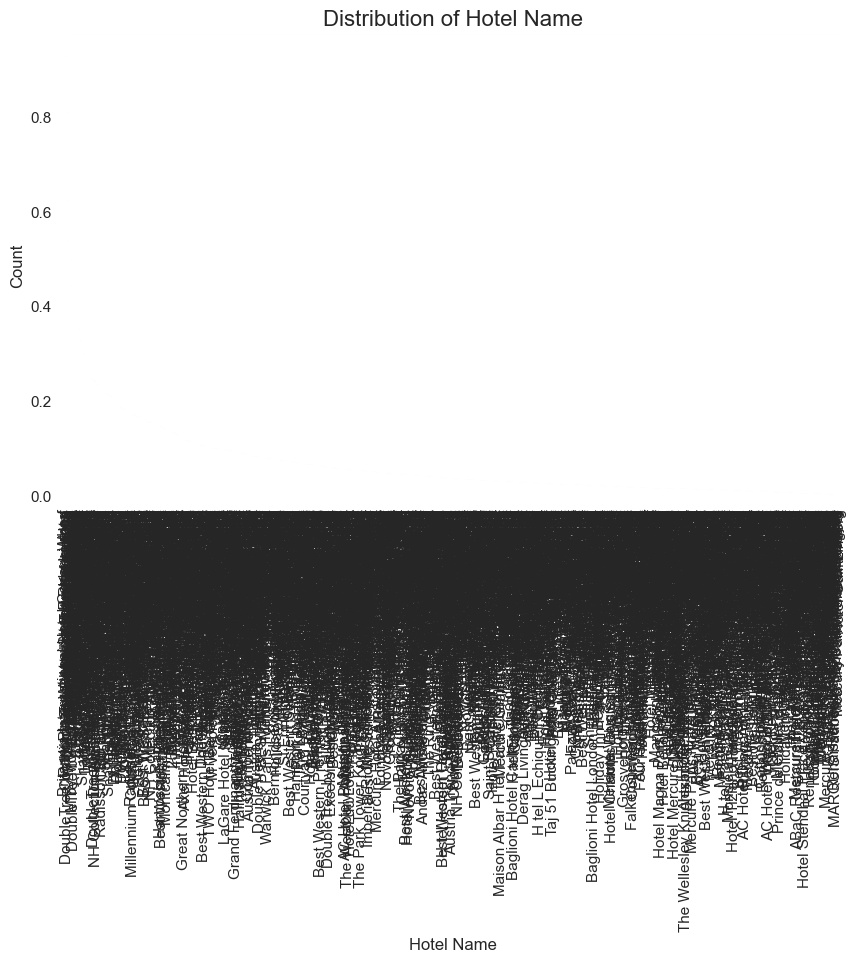

In [32]:
# plotting the distribution of the Hotel_Name column
plt.figure(figsize=(10, 6))
percentage.plot(kind='bar')
plt.title('Distribution of Hotel Name', fontsize=16)
plt.xlabel('Hotel Name')
plt.ylabel('Count')
plt.show()

Now that we have an idea of how to split the hotels into groups, we can create a function that will return the category of the hotel popularity based on the proportion of reviews.

In [33]:
# grouping the hotels by the number of reviews
low = hotel_df['Hotel_Name'].map(percentage) < 0.1
medium = hotel_df['Hotel_Name'].map(percentage).between(0.1, 0.38)
high = hotel_df['Hotel_Name'].map(percentage) > 0.38

# using the mask() method to replace the low frequency categories with 'Low Popularity'
hotel_df['Hotel_Name'] = hotel_df['Hotel_Name'].mask(low, 'Low Popularity')

# using the mask() method to replace the medium frequency categories with 'Medium Popularity'
hotel_df['Hotel_Name'] = hotel_df['Hotel_Name'].mask(medium, 'Medium Popularity')

# using the mask() method to replace the high frequency categories with 'High Popularity'
hotel_df['Hotel_Name'] = hotel_df['Hotel_Name'].mask(high, 'High Popularity')

# checking the results
hotel_df['Hotel_Name'].value_counts()


Medium Popularity    246010
Low Popularity       216740
High Popularity       52988
Name: Hotel_Name, dtype: int64

Now that we have categorized the hotels, we rename the `Hotel_Name` column to `Hotel_Popularity`, and then convert the `Hotel_Popularity` column into numeric values using the get_dummies method.

In [34]:
# renaming the Hotel_Name column
hotel_df.rename(columns={'Hotel_Name': 'Hotel_Popularity'}, inplace=True)

# Using the get_dummies() method to convert the Hotel_Popularity column to dummy variables
hotel_df2 = pd.get_dummies(hotel_df, columns=['Hotel_Popularity'], drop_first=True)

# checking the results
hotel_df2.columns

Index(['Additional_Number_of_Scoring', 'Average_Score', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Hotel_City_Country_Barcelona Spain',
       'Hotel_City_Country_London United Kingdom',
       'Hotel_City_Country_Milan Italy', 'Hotel_City_Country_Paris France',
       'Hotel_City_Country_Vienna Austria', 'Review_Year', 'Review_Month',
       'Review_Day', 'Hotel_Popularity_Low Popularity',
       'Hotel_Popularity_Medium Popularity'],
      dtype='object')

Great! We have successfully converted the `Hotel_Name` column into a new column called `Hotel_Popularity` and then converted the `Hotel_Popularity` column into numeric values.

## **Reviewer_Nationality**

Let's begin by inspecting the column.

In [35]:
# using the .value_counts() method to find the unique values in the Reviewer_Nationality column
v_counts = hotel_df2['Reviewer_Nationality'].value_counts()

# using the nunique() method to find the number of unique values in the Reviewer_Nationality column
n_uniq = hotel_df2['Reviewer_Nationality'].nunique()

print(v_counts)
print(f'There are {n_uniq} unique values in the Reviewer_Nationality column.')

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64
There are 227 unique values in the Reviewer_Nationality column.


This is a large amount of unique values. Lets take a look at the proportions to get a better understanding.

In [36]:
# inspecting the proportions of the column.
percent = hotel_df2['Reviewer_Nationality'].value_counts()/hotel_df2['Reviewer_Nationality'].shape*100

print(percent.head(20))

 United Kingdom               47.552439
 United States of America      6.871124
 Australia                     4.204848
 Ireland                       2.874909
 United Arab Emirates          1.984535
 Saudi Arabia                  1.735571
 Netherlands                   1.700864
 Switzerland                   1.682637
 Germany                       1.539735
 Canada                        1.530622
 France                        1.414672
 Israel                        1.281659
 Italy                         1.185486
 Belgium                       1.169392
 Turkey                        1.055575
 Kuwait                        0.953973
 Spain                         0.918490
 Romania                       0.882619
 Russia                        0.756198
 South Africa                  0.740880
Name: Reviewer_Nationality, dtype: float64


From these results, we can see that approximately 47% of the reviewers are from the United Kingdom. So in order to reduce the number of unique values, we can group the reviewers nationality proportion, under 1%, into a category called `Other`.

In [37]:
# grouping the Reviewer Nationality thats under 1% to Other.
other_n = hotel_df2['Reviewer_Nationality'].map(percent) < 1

# converting to a new category called Other.
hotel_df2['Reviewer_Nationality'] =  hotel_df2['Reviewer_Nationality'].mask(other_n, 'Other Nationalities')

# inspecting result
hotel_df2['Reviewer_Nationality'].value_counts()

 United Kingdom               245246
Other Nationalities           114576
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
Name: Reviewer_Nationality, dtype: int64

We have now reduced the amount of unique values. Let's take a look at the distribution of the `Reviewer_Nationality` column.

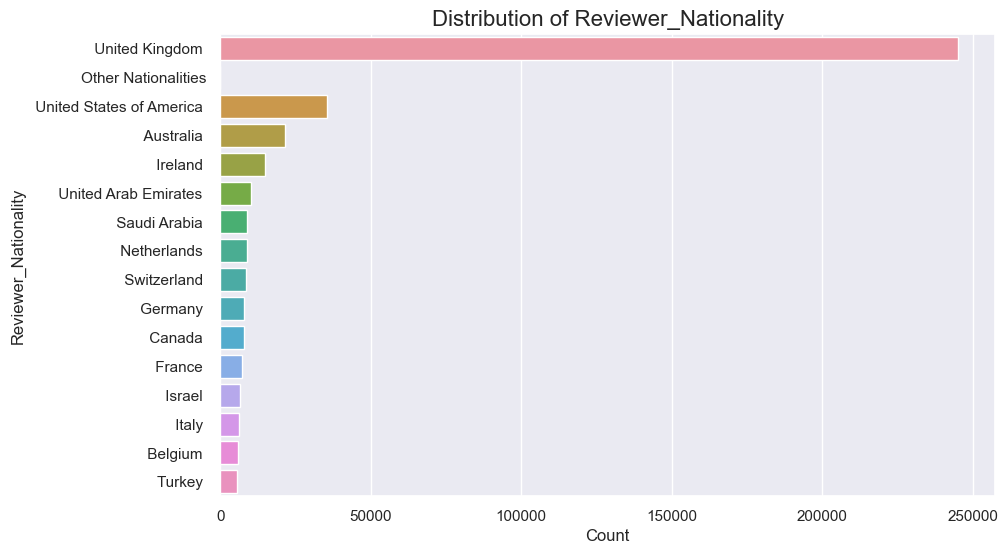

In [38]:
# plotting the distribution of the Reviewer_Nationality column
plt.figure(figsize=(10, 6))
sns.countplot(y=hotel_df['Reviewer_Nationality'], order=hotel_df2['Reviewer_Nationality'].value_counts().index)
plt.title('Distribution of Reviewer_Nationality', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Reviewer_Nationality')
plt.show()

We can now see that the other nationalities represents a larger portion when combined. We can now use the get_dummies to convert this to a numeric column.

In [39]:
# using get_dummies to convert the Reviewer_Nationality column to dummy variables
hotel_df3 = pd.get_dummies(hotel_df2, columns=['Reviewer_Nationality'], drop_first=True)

# checking the results
hotel_df3.columns

Index(['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Hotel_City_Country_Barcelona Spain',
       'Hotel_City_Country_London United Kingdom',
       'Hotel_City_Country_Milan Italy', 'Hotel_City_Country_Paris France',
       'Hotel_City_Country_Vienna Austria', 'Review_Year', 'Review_Month',
       'Review_Day', 'Hotel_Popularity_Low Popularity',
       'Hotel_Popularity_Medium Popularity', 'Reviewer_Nationality_ Belgium ',
       'Reviewer_Nationality_ Canada ', 'Reviewer_Nationality_ France ',
       'Reviewer_Nationality_ Germany ', 'Reviewer_Nationality_ Ireland ',
       'Reviewer_Nationality_ Israel ', 'Reviewer_Nationality_ Italy ',
       'Reviewer_Nationality_ Netherlands ',
       'Reviewer_Nationality_ 

Great! We have successfully converted the `Reviewer_Nationality` column into numeric values.

## **Tags**

Let's begin by inspecting the column.

In [40]:
# using the .value_counts() method to find the unique values in the Tags column
v_counts = hotel_df3['Tags'].value_counts()

# using the nunique() method to find the number of unique values in the Tags column
n_uniq = hotel_df3['Tags'].nunique()

print(v_counts)
print(f'There are {n_uniq} unique values in the Tags column.')

[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                  5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                         4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                         4366
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                           3991
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                                 3291
                                                                                                                                         ... 
[' Leisure trip ', ' Family with older children ', ' Suite Family Room ', ' Stayed 5 nights ', ' Submitted from a mobile device ']          1
[' Bus

We can see that the number of tags is inconsistent throughout. To tackle this, we will create a new column that will contain the number of tags for each review. This will allow us to convert the `Tags` column into numeric values.

In [41]:
# counting the number of tags in each row
hotel_df3['Tags_Count'] = hotel_df3['Tags'].str.count(',') + 1

# checking the results
hotel_df3['Tags_Count'].value_counts()

5    297823
4    211564
3      5505
6       755
2        85
1         6
Name: Tags_Count, dtype: int64

Now lets drop the `Tags` column as we have created a new column called `Number_of_Tags`.
The `Tags` column itself could be used for feature engineering, but we will make the aurgument that the number of tags is more important than the tags themselves. The reason for this is that the tags are not ordinal, and there are too many unique values to convert to numeric values. Also, the tags look like they are similar to the `Positive_Review` and `Negative_Review` columns. So we will drop the `Tags` column.

In [42]:
# dropping the Tags column
hotel_df3.drop('Tags', axis=1, inplace=True)

# checking the results
hotel_df3.columns

Index(['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng', 'Hotel_City_Country_Barcelona Spain',
       'Hotel_City_Country_London United Kingdom',
       'Hotel_City_Country_Milan Italy', 'Hotel_City_Country_Paris France',
       'Hotel_City_Country_Vienna Austria', 'Review_Year', 'Review_Month',
       'Review_Day', 'Hotel_Popularity_Low Popularity',
       'Hotel_Popularity_Medium Popularity', 'Reviewer_Nationality_ Belgium ',
       'Reviewer_Nationality_ Canada ', 'Reviewer_Nationality_ France ',
       'Reviewer_Nationality_ Germany ', 'Reviewer_Nationality_ Ireland ',
       'Reviewer_Nationality_ Israel ', 'Reviewer_Nationality_ Italy ',
       'Reviewer_Nationality_ Netherlands ',
       'Reviewer_Nationality_ Saudi Ar

Great! We have successfully converted the `Tags` column into a new column called `Number_of_Tags`, and then dropped the `Tags` column.

## **Days_Since_Review**

Let's begin by inspecting the column.

In [43]:
# using the .value_counts() method to find the unique values in the days_since_review column
v_counts = hotel_df3['days_since_review'].value_counts()

# using the nunique() method to find the number of unique values in the days_since_review column
n_uniq = hotel_df3['days_since_review'].nunique()

print(v_counts)
print(f'There are {n_uniq} unique values in the days_since_review column.')

1 days     2585
322 day    2308
120 day    2284
338 day    1963
534 day    1940
           ... 
327 day     199
615 day     194
122 day     192
124 day     173
123 day     143
Name: days_since_review, Length: 731, dtype: int64
There are 731 unique values in the days_since_review column.


It looks like the `Days_Since_Review` column contains the number of days since the review was posted. We can convert this to a numeric column by removing the `days` text. This will allow us to convert the column to a numeric column.

In [44]:
# removing the days text from the days_since_review column
hotel_df3['days_since_review'] = hotel_df3['days_since_review'].str.replace('days', '')

# checking the results
hotel_df3['days_since_review'].value_counts()

1          2585
322 day    2308
120 day    2284
338 day    1963
534 day    1940
           ... 
327 day     199
615 day     194
122 day     192
124 day     173
123 day     143
Name: days_since_review, Length: 731, dtype: int64

It looks like theres more text in the `Days_Since_Review` column. Let's remove them too.

In [45]:
# removing the day text from the days_since_review column
hotel_df3['days_since_review'] = hotel_df3['days_since_review'].str.replace('day', '')

# checking the results
hotel_df3['days_since_review'].value_counts()

1       2585
322     2308
120     2284
338     1963
534     1940
        ... 
327      199
615      194
122      192
124      173
123      143
Name: days_since_review, Length: 731, dtype: int64

This looks much better. We can now convert the `Days_Since_Review` column to a numeric column.  

In [46]:
# converting the days_since_review column to numeric
hotel_df3['days_since_review'] = pd.to_numeric(hotel_df3['days_since_review'])

# checking the results
hotel_df3['days_since_review'].dtype

dtype('int64')

Fantastic! We have successfully converted the `Days_Since_Review` column into numeric values.

#### **Splitting the data into train and test sets.**

We can now split the data into train and test sets. We will use 80% of the data for training and 20% for testing. We will also set the random state to 42 to ensure reproducibility. We will also set the stratify parameter to the `Reviewer_Score` column to ensure that the train and test sets have the same proportion of positive and negative reviews.

In [47]:
# importing the libraries for the model
from sklearn.model_selection import train_test_split

# splitting the data into train and test sets
X = hotel_df3.drop('Reviewer_Score', axis=1)
y = hotel_df3['Reviewer_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# checking the shape of the train and test sets
print(f'The shape of the X_train set is {X_train.shape}')
print(f'The shape of the X_test set is {X_test.shape}')
print(f'The shape of the y_train set is {y_train.shape}')
print(f'The shape of the y_test set is {y_test.shape}')

The shape of the X_train set is (412590, 37)
The shape of the X_test set is (103148, 37)
The shape of the y_train set is (412590,)
The shape of the y_test set is (103148,)


Now that we have split the data into train and test sets, we can use a count vectorizer to combine the `Positive_Review` and `Negative_Review` columns with the numeric data. We will vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). We will have to adjust the `min_df` parameter to ensure that the vectorizer does not ignore words that are too rare.

In [48]:
# using a count vectorizer to combine the Positive_Review and Negative_Review columns
from sklearn.feature_extraction.text import CountVectorizer

# instantiating the CountVectorizer
cv = CountVectorizer(min_df=0.045, ngram_range=(1, 2), stop_words='english') # adjust the min_df and max_df parameters to get the best results

# fitting the CountVectorizer to the Positive_Review column
cv.fit(X_train['Positive_Review'])

# transforming the Positive_Review column
X_train_pos = cv.transform(X_train['Positive_Review'])

# transforming the Positive_Review column
X_test_pos = cv.transform(X_test['Positive_Review'])

# fitting the CountVectorizer to the Negative_Review column
cv.fit(X_train['Negative_Review'])

# transforming the Negative_Review column
X_train_neg = cv.transform(X_train['Negative_Review'])

# transforming the Negative_Review column
X_test_neg = cv.transform(X_test['Negative_Review'])


Lets take a look at the feature names and see if we need to adjust the `min_df` parameter. What we are looking for is words that are too rare to be useful, and words that are too common to be useful.

In [49]:
# checking the feature names
cv.get_feature_names_out()

array(['bathroom', 'bed', 'bit', 'breakfast', 'hotel', 'negative', 'room',
       'rooms', 'small', 'staff'], dtype=object)

 We can see that there are some words that are too rare, and some words that are too common. We will adjust the `min_df` parameter to 0.01 to ensure that the vectorizer does not ignore words that are too rare. We will also adjust the `max_df` parameter to 0.90 to ensure that the vectorizer does not ignore words that are too common. We will also set the `ngram_range` parameter to (1,2) to ensure that the vectorizer includes both unigrams and bigrams. We will also set the stop_words parameter to english to ensure that the vectorizer ignores common english words.

In [50]:
# instantiating the CountVectorizer
cv = CountVectorizer(min_df=0.01, max_df=0.9, ngram_range=(1, 2), stop_words='english') # adjust the min_df and max_df parameters to get the best results

# fitting the CountVectorizer to the Positive_Review column
cv.fit(X_train['Positive_Review'])

# transforming the Positive_Review column
X_train_pos = cv.transform(X_train['Positive_Review'])

# transforming the Positive_Review column
X_test_pos = cv.transform(X_test['Positive_Review'])

# fitting the CountVectorizer to the Negative_Review column
cv.fit(X_train['Negative_Review'])

# transforming the Negative_Review column
X_train_neg = cv.transform(X_train['Negative_Review'])

# transforming the Negative_Review column
X_test_neg = cv.transform(X_test['Negative_Review'])

In [51]:
# checking the feature names
cv.get_feature_names_out()

array(['air', 'air conditioning', 'area', 'arrived', 'asked', 'available',
       'bad', 'bar', 'bath', 'bathroom', 'bed', 'beds', 'better', 'bit',
       'booked', 'booking', 'breakfast', 'check', 'city', 'clean',
       'coffee', 'cold', 'comfortable', 'conditioning', 'couldn', 'day',
       'days', 'desk', 'did', 'didn', 'dirty', 'don', 'door', 'double',
       'early', 'expensive', 'extra', 'facilities', 'far', 'floor',
       'food', 'free', 'given', 'good', 'got', 'great', 'guests', 'hard',
       'having', 'high', 'hot', 'hotel', 'hotels', 'just', 'left', 'lift',
       'like', 'little', 'location', 'london', 'long', 'lot', 'make',
       'money', 'morning', 'need', 'needs', 'negative', 'nice', 'night',
       'noise', 'noisy', 'old', 'open', 'outside', 'paid', 'parking',
       'pay', 'people', 'place', 'pool', 'poor', 'price', 'problem',
       'quite', 'really', 'reception', 'restaurant', 'room',
       'room service', 'room small', 'rooms', 'said', 'service', 'shower',
     

This looks better. Now that we have vectorized the `Positive_Review` and `Negative_Review` columns, we can combine the three matrixes (numeric data, positive matrix, negative matrix) into one matrix. We can do this by using the hstack method.

In [52]:
# combining the numerical data with the sparse matrix
from scipy.sparse import hstack

# combining the sparse matrix with the numerical data
X_train = hstack([X_train_pos, X_train_neg, X_train.drop(['Positive_Review', 'Negative_Review'], axis=1)])

# combining the sparse matrix with the numerical data
X_test = hstack([X_test_pos, X_test_neg, X_test.drop(['Positive_Review', 'Negative_Review'], axis=1)])

# checking the shape of the train and test sets
print(f'The shape of the X_train set is {X_train.shape}')
print(f'The shape of the X_test set is {X_test.shape}')
print(f'The shape of the y_train set is {y_train.shape}')
print(f'The shape of the y_test set is {y_test.shape}')

The shape of the X_train set is (412590, 319)
The shape of the X_test set is (103148, 319)
The shape of the y_train set is (412590,)
The shape of the y_test set is (103148,)


Great! We have successfully combined the three matrixes (numeric data, positive matrix, negative matrix) into one matrix.

Before we move on, lets save the vectorized data as a pickle file. This will allow us to use the vectorized data in the next notebook.

In [53]:
# saving the train and test sets
import pickle

pickle.dump(X_train, open('X_train.pkl', 'wb'))
pickle.dump(X_test, open('X_test.pkl', 'wb'))
pickle.dump(y_train, open('y_train.pkl', 'wb'))
pickle.dump(y_test, open('y_test.pkl', 'wb'))
 

# checking if the files were saved
# loading the train and test sets
X_train = pickle.load(open('X_train.pkl', 'rb'))
X_test = pickle.load(open('X_test.pkl', 'rb'))
y_train = pickle.load(open('y_train.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(412590, 319)
(103148, 319)
(412590,)
(103148,)


***

## **Conclusion**

In this project, we have successfully cleaned and prepared the data for modeling. We have also used a count vectorizer to combine the `Positive_Review` and `Negative_Review` columns with the numeric data. This will allow us to use the text data in our model in the next project.